In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score , confusion_matrix

In [4]:
data = pd.read_csv( 'data.csv' )
data.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


In [5]:
x_label = data[['x1','x2']]
y_label = data[['label']]

In [6]:
x_label.head(2)

,x1,x2
0,2.6487,4.5192
1,1.5438,2.4443


In [7]:
y_label.head(2)

,label
0,1
1,1


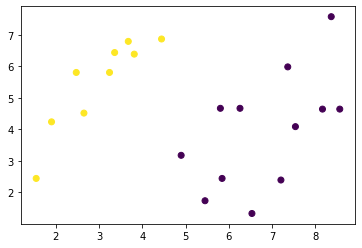

In [8]:
plt.scatter( data.x1 , data.x2 , c = data.label)

In [9]:

x = tf.placeholder( tf.float32 , [None , 2] )
y = tf.placeholder( tf.float32 , [None , 1] )

# weight and bias - Layer 1

weight1 = tf.Variable( tf.truncated_normal([2,100] , stddev = 0.1) )
bias1 = tf.Variable( tf.truncated_normal([100] , stddev = 0.1) )

# input function -1 

netinput1 = tf.add(  tf.matmul(x,weight1) , bias1 )
output1 = tf.sigmoid(netinput1)


In [10]:
# weight and bias - Layer 2

weight2 = tf.Variable( tf.truncated_normal([100,50] , stddev = 0.1) )
bias2 = tf.Variable( tf.truncated_normal([50] , stddev = 0.1) )

# input function - 2

netinput2 = tf.add(  tf.matmul(output1,weight2) , bias2 )
output2 = tf.sigmoid(netinput2)


In [11]:
# weight and bias - Layer 3

weight3 = tf.Variable( tf.truncated_normal([50,1] , stddev = 0.1) )
bias3 = tf.Variable( tf.truncated_normal([1] , stddev = 0.1) )

# input function - 2

netinput3 = tf.add(  tf.matmul(output2,weight3) , bias3 )
output3 = tf.sigmoid(netinput3)


In [13]:
# Loss Function

individual_loss = tf.nn.sigmoid_cross_entropy_with_logits( labels = y , logits = output3 )

loss = tf.reduce_mean( individual_loss )

gdo = tf.train.GradientDescentOptimizer( learning_rate = 0.01 )

train = gdo.minimize( loss )

init_op = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
sess = tf.Session()
sess.run(init_op)

In [15]:
for i in range(10000) :
    sess.run( train , feed_dict = { x : x_label , y : y_label } )

In [16]:
result = sess.run( output3 , feed_dict = { x : x_label , y : y_label } )

y_pred = result.round()

y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [17]:
accuracy_score( y_label , y_pred )

0.5714285714285714

In [18]:
# inspection

In [19]:
sess.run( output1 , feed_dict = { x : x_label , y : y_label } )

array([[0.34632248, 0.4797957 , 0.5287009 , ..., 0.40227404, 0.4576108 ,
        0.6024975 ],
       [0.41623753, 0.49267656, 0.5242279 , ..., 0.4439712 , 0.46620297,
        0.55202395],
       [0.37434947, 0.47253042, 0.5281752 , ..., 0.42951763, 0.43759122,
        0.58094627],
       ...,
       [0.16384113, 0.5220367 , 0.5347906 , ..., 0.22178486, 0.5893656 ,
        0.7575648 ],
       [0.19012952, 0.5662676 , 0.528254  , ..., 0.21845722, 0.659443  ,
        0.7362075 ],
       [0.19864768, 0.56037146, 0.52830315, ..., 0.22875983, 0.6465432 ,
        0.7281946 ]], dtype=float32)

In [20]:
sess.run( output2 , feed_dict = { x : x_label , y : y_label } )

array([[0.58369744, 0.42128187, 0.52440864, ..., 0.6316649 , 0.5884206 ,
        0.36447966],
       [0.5837364 , 0.4283345 , 0.5005869 , ..., 0.64005786, 0.5831568 ,
        0.38123238],
       [0.58280724, 0.41551122, 0.51995265, ..., 0.63467145, 0.590462  ,
        0.37404168],
       ...,
       [0.5891072 , 0.45335528, 0.56206304, ..., 0.6095063 , 0.5769505 ,
        0.30316353],
       [0.5916495 , 0.4850196 , 0.53480345, ..., 0.61447567, 0.5609458 ,
        0.300561  ],
       [0.59114665, 0.48088315, 0.53439516, ..., 0.6154903 , 0.56285834,
        0.3042846 ]], dtype=float32)

In [25]:
np.log(5)

1.6094379124341003